# I. Difference Between Supervised and Unsupervised Algorithms

The main distinction between the two approaches is the use of labeled datasets. To put it simply, supervised learning uses labeled input and output data, while an unsupervised learning algorithm does not.

Classifying big data can be a real challenge in supervised learning, but the results are highly accurate and trustworthy. In contrast, unsupervised learning can handle large volumes of data in real time. But, there’s a lack of transparency into how data is clustered and a higher risk of inaccurate results. This is where semi-supervised learning comes in.

## 1. Supervised Algorithm

Supervised learning is a machine learning approach that’s defined by its use of labeled datasets. These datasets are designed to train or “supervise” algorithms into classifying data or predicting outcomes accurately. Using labeled inputs and outputs, the model can measure its accuracy and learn over time.

Real World Example: Linear Regression Example
For example, a supervised learning model can predict how long your commute will be based on the time of day, weather conditions and so on. But first, you’ll have to train it to know that rainy weather extends the driving time.

## 2. Unsupervised Algorithm

Unsupervised learning uses machine learning algorithms to analyze and cluster unlabeled data sets. These algorithms discover hidden patterns in data without the need for human intervention (hence, they are “unsupervised”). Note that they still require some human intervention for validating output variables.

Real World Example: Apriori Algorithm Example
For example, an unsupervised learning model can identify that online shoppers often purchase groups of products at the same time. However, a data analyst would need to validate that it makes sense for a recommendation engine to group baby clothes with an order of diapers, applesauce and sippy cups.

## II. Supervised Algorithm - Naive Bayes Model

## Naive Bayes Model

A naive Bayes classifier is an algorithm that uses Bayes' theorem to classify objects. Naive Bayes classifiers assume strong, or naive, independence between attributes of data points. Popular uses of naive Bayes classifiers include spam filters, text analysis and medical diagnosis. These classifiers are widely used for machine learning because they are simple to implement.

### Goal:

It is to classified what kind of animal based on different features use in the data sets.

### Data Sets Used: 

Animals.xlsx - This data set was use from Prof Elect 2 where we used R programming to Classified the animals

## Data Collection

In [1]:
# Import pandas
import pandas as pd
# Load the xlsx file
excel_data = pd.read_excel('animals.xlsx')
# Read the values of the file in the dataframe

data = pd.DataFrame(excel_data, 
        columns=['1. animal name:', '2. hair', '3. feathers', '4. eggs', '5. milk', 
            '6. airborne', '7. aquatic', '8. predator', '9. toothed', '10. backbone', 
            '11. breathes', '12. venomous', '13. fins', '14. legs', '15. tail', 
            '16. domestic', '17. catsize', '18. type'
])
# Print the content
print("The content of the file is:\n", data)

The content of the file is:
     1. animal name:  2. hair  3. feathers  4. eggs  5. milk  6. airborne  \
0          aardvark     True        False    False     True        False   
1          antelope     True        False    False     True        False   
2              bass    False        False     True    False        False   
3              bear     True        False    False     True        False   
4              boar     True        False    False     True        False   
..              ...      ...          ...      ...      ...          ...   
96          wallaby     True        False    False     True        False   
97             wasp     True        False     True    False         True   
98             wolf     True        False    False     True        False   
99             worm    False        False     True    False        False   
100            wren    False         True     True    False         True   

     7. aquatic  8. predator  9. toothed  10. backbone  11

## Splitting Dataset into Training set and Testing Set

In [2]:
# get all the columns in data
data.info()
# convert columns 
# if column '18. type' is not NaN, then add it to the training_set dataframe
training_set = data[data['18. type'].notnull()] 
# if column '18. type' is NaN, then add it to the testing_set dataframe
testing_set = data[data['18. type'].isnull()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   1. animal name:  101 non-null    object
 1   2. hair          101 non-null    bool  
 2   3. feathers      101 non-null    bool  
 3   4. eggs          101 non-null    bool  
 4   5. milk          101 non-null    bool  
 5   6. airborne      101 non-null    bool  
 6   7. aquatic       101 non-null    bool  
 7   8. predator      101 non-null    bool  
 8   9. toothed       101 non-null    bool  
 9   10. backbone     101 non-null    bool  
 10  11. breathes     101 non-null    bool  
 11  12. venomous     101 non-null    bool  
 12  13. fins         101 non-null    bool  
 13  14. legs         101 non-null    int64 
 14  15. tail         101 non-null    bool  
 15  16. domestic     101 non-null    bool  
 16  17. catsize      101 non-null    bool  
 17  18. type         90 non-null     ob

## Model Training

## Bernoulli Naive Bayes

 BernoulliNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable. Therefore, this class requires samples to be represented as binary-valued feature vectors; if handed any other kind of data, a BernoulliNB instance may binarize its input (depending on the binarize parameter).

In [3]:
# import libraries for naive bayes using bernoulli naive bayes
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
# fit the model
model = model.fit(training_set.iloc[:, 1:17], training_set.iloc[:, 17])

## Prediction and its Accuracy Result

In [4]:
# predict the values
predictions = model.predict(testing_set.iloc[:, 1:17])
model_class = model.classes_
# get the level names in model
print("\nThe level names in the model are:\n", model_class)
# append to test set
testing_set['18. type'] = predictions
# accuracy of the predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(testing_set.iloc[:, 17], predictions)


The level names in the model are:
 ['amphibian' 'bird' 'fish' 'insect' 'invertebrate' 'mammal' 'reptile']


C:\Users\crisb\AppData\Local\Temp/ipykernel_22820/2207281860.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_set['18. type'] = predictions


## Confusion Matrix

In [5]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(testing_set.iloc[:, 17], predictions)

## III. Unsupervised Algorithm - K-Means Clustering Algorithm

## K-Means Clustering Algorithm

### Goal:

It is to cluster the students based on the features used in the data set.

### Data Sets Used: 

SortedFinalData.csv - This data set was use from Prof Elect 2 where we used R programming to cluster the students.

## Data Collection

In [6]:
# Import pandas
import pandas as pd
# Load the xlsx file
excel_data = pd.read_excel('students.xlsx')
# Read the values of the file in the dataframe

stud_data = pd.DataFrame(excel_data, 
                columns=[
                    'stud_no', 'firstname', 'lastname', 'gender', 'avg_grade', 'IQ', 'birthdate', 'hometown', 'age', 'lat', 'long'

])
# Print the content
print("The content of the file is:\n", stud_data)

The content of the file is:
       stud_no firstname lastname  gender  avg_grade   IQ            birthdate  \
0           1    Marion     Reed       1   2.145454  103      12/27/1984 0:00   
1           2    Myrtle  Carroll       1   1.833333   83  1984-11-07 00:00:00   
2           3   Douglas   Harmon       1   1.925000   92  1984-11-07 00:00:00   
3           4    Steven    Hayes       0   1.520000   91  1988-03-12 00:00:00   
4           5     Celia     Bass       0   1.565000   92  1984-02-08 00:00:00   
...       ...       ...      ...     ...        ...  ...                  ...   
7478     7479   Johanna    Davis       1   1.446153   90      12/23/1987 0:00   
7479     7480    Sylvia   Barnes       1   2.046153   98  1987-08-11 00:00:00   
7480     7481    Nellie      Kim       1   1.615384  111       4/20/1987 0:00   
7481     7482  Franklin   Hudson       1   1.426923   97  1986-01-07 00:00:00   
7482     7483     Wayne   Barnes       1   2.107692   83  1987-07-01 00:00:00   

## Data Cleansing

In [7]:
# append stud_no, gender, 'avg_grade', 'IQ', 'age', 'lat', 'long' into dataframe
fin_stud = stud_data[['stud_no','gender','avg_grade','IQ','age','lat','long']].copy()
fin_stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7483 entries, 0 to 7482
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   stud_no    7483 non-null   int64  
 1   gender     7483 non-null   int64  
 2   avg_grade  7483 non-null   float64
 3   IQ         7483 non-null   int64  
 4   age        7483 non-null   float64
 5   lat        7483 non-null   float64
 6   long       7483 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 409.4 KB


## Plot The Entrire Dataset

In [8]:
import plotly.express as px
fig = px.scatter_matrix(fin_stud,
width=1200, height=1600)
fig.show()

## Model Training

## K-Means Clustering Algorithm

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes.

A cluster refers to a collection of data points aggregated together because of certain similarities.

You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster.

In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

Note: It’s essential to establish that clustering is just a tool to achieve a determined business goal. The problem isn’t to create the best clusters (it helps, though), or just to use machine learning. The problem, in our case, is that we want to understand who our customers are.

In [9]:
# library for kmeans clustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Kmean = KMeans(n_clusters=5, random_state=1).fit(fin_stud)
# Kmean = KMeans(n_clusters=2)
# Kmean.fit(fin_stud)
Kmean = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
n_clusters=5, n_init=10, precompute_distances='auto',
random_state=None, tol=0.0001, verbose=0).fit(fin_stud)
cluster = Kmean.cluster_centers_
print(cluster)
labels = Kmean.labels_
print(labels)

c:\Users\crisb\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning:

'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect



[[7.59000000e+02 4.99670402e-01 2.08718055e+00 9.79815425e+01
  4.12643357e+01 1.02272960e+01 1.22744831e+02]
 [5.27400000e+03 4.83479434e-01 1.82292328e+00 9.89608901e+01
  3.62187016e+01 1.02107771e+01 1.22171596e+02]
 [3.78200000e+03 5.12325117e-01 1.89435744e+00 9.57628248e+01
  3.69699864e+01 1.02193175e+01 1.22850303e+02]
 [6.74950000e+03 5.06130790e-01 1.77134435e+00 9.93950954e+01
  3.51196999e+01 1.02265007e+01 1.23091942e+02]
 [2.27450000e+03 5.25099075e-01 2.04935704e+00 9.61188904e+01
  3.72728666e+01 1.02226763e+01 1.22737999e+02]]
[0 0 0 ... 3 3 3]


## Get Cluster Size

In [10]:
from collections import Counter
Counter(Kmean.labels_)

Counter({0: 1516, 4: 1512, 2: 1500, 1: 1483, 3: 1472})

## Append the Result Clusters to the fin_stud

In [11]:
stud_clus = fin_stud.copy()
stud_clus['cluster'] = labels

## Plot the Cluster Results

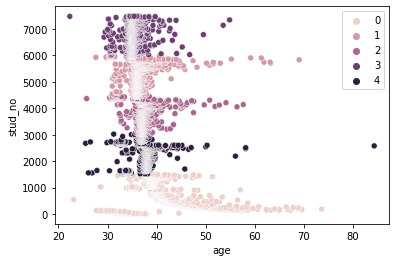

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
# 'stud_no','gender','avg_grade','IQ','age','lat','long' -> choices for y
sns.scatterplot(data=stud_clus, x="age", y="stud_no", hue=labels)
plt.show()
# fig = px.scatter_matrix(stud_clus,
# width=1200, height=1600)
# fig.show()

## Save as a Final CSV file

In [ ]:
# save stud_clus as csv file
stud_clus.to_csv('stud_clus.csv', index=False)
# save stud_clus as xlsx file
stud_clus.to_excel('stud_clus.xlsx', index=False)